In [1]:
import pandas as pd
from final_project.notebooks.training_pipeline import auto_training_pipeline

In [2]:
happiness_df = pd.read_csv("../../data/countries/processed/learning_happiness.csv")
economic_df = pd.read_csv("../../data/countries/processed/learning_economic.csv")
combined_df = pd.read_csv("../../data/countries/processed/learning_combined_countries.csv")

Checking whether there is an H2O instance running at http://127.0.0.1:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,13 secs
H2O_cluster_timezone:,Asia/Jerusalem
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 9 days
H2O_cluster_name:,H2O_from_python_eysto_06ry3o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.955 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,24
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
features ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
AutoML progress: |
20:40:09.966: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
20:40:09.974: AutoML: XGBoost is not available; skipping it.

██
20:40:11.664: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 97.0.

█████████████████████████████████████████████████████████████| (done) 100%
Test Metrics:
mse: 0.33468843047008495
R squared: 0.6905609374787016
AUC: NaN
Logloss: 0.9595626537520957


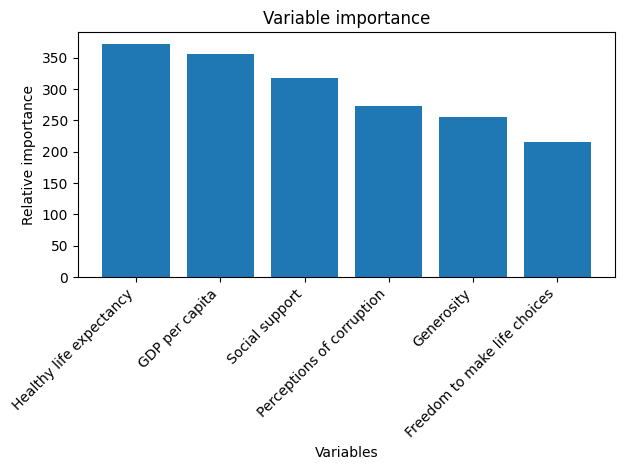

In [16]:
perf_happiness_reviews, best_model_happiness_reviews, leaderboard_happiness_reviews = auto_training_pipeline(
    df=happiness_df,
    target_col='Score',
    max_runtime_secs=300,
    max_models=10,
    sort_metric='mse',
    balance_classes=False,
    print_metrics=True,
    show_scoring_history=True,
    show_variable_importance=True,
    shutdown_h2o_after_train=False
)

In [17]:
leaderboard_happiness_reviews

model_id,mse,mean_per_class_error,logloss,rmse
DRF_1_AutoML_1_20250311_204009,0.349298,0.50822,1.08099,0.591014
GBM_4_AutoML_1_20250311_204009,0.355707,0.516765,1.07143,0.596412
GLM_1_AutoML_1_20250311_204009,0.359531,0.616645,1.04381,0.599609
XRT_1_AutoML_1_20250311_204009,0.362598,0.477967,1.46745,0.602161
GBM_3_AutoML_1_20250311_204009,0.362894,0.597969,1.09236,0.602407
GBM_5_AutoML_1_20250311_204009,0.371741,0.477967,1.23828,0.609705
GBM_2_AutoML_1_20250311_204009,0.376873,0.572412,1.12168,0.6139
GBM_grid_1_AutoML_1_20250311_204009_model_1,0.37762,0.570374,1.11749,0.614508
StackedEnsemble_AllModels_1_AutoML_1_20250311_204009,0.40476,0.631257,1.2086,0.636208
StackedEnsemble_BestOfFamily_1_AutoML_1_20250311_204009,0.409612,0.640148,1.21065,0.640009


In [18]:
best_model_happiness_reviews

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20250311_204009


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    34                 204                         37187                  1            12           5.60294       2             22            9.91177

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.34380098343086435
RMSE: 0.5863454471818336
LogLoss: 2.324272161192611
Mean Per-Class Error: 0.5275274917365879
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
3    4    5    6    7    8    Error     Rate
---  ---  ---  ---  ---  ---  --------  -------
0    3    1    0    0    0    1         4 / 4
2    11   3    3    0    0    0.421053  8 / 19
1    4    9    9    0    0    0.608696  14 / 23
0    1    9    21   1    0    0.34375   11 / 32
0    0    1    1    14   0    0.125     2 / 16
0    0    0    0    2    1    0.666667  2 / 3
3    19   23   34   17   1    0.42268   41 / 97

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.57732
2    0.814433
3    0.896907
4    0.948454
5    0.948454
6    1

ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.373486381387027
RMSE: 0.6111353216653632
LogLoss: 1.052070189745444
Mean Per-Class Error: 0.5059523809523809
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
3    4    5    6    7    8    Error     Rate
---  ---  ---  ---  ---  ---  --------  ------
0    1    0    0    0    0    1         1 / 1
0    5    2    0    0    0    0.285714  2 / 7
0    0    1    3    0    0    0.75      3 / 4
0    0    0    2    0    0    0         0 / 2
0    0    0    1    0    0    1         1 / 1
0    0    0    0    0    0    nan       0 / 0
0    6    3    6    0    0    0.466667  7 / 15

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.533333
2    0.733333
3    1
4    1
5    1
6    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.34929786921340994
RMSE: 0.5910142715818375
LogLoss: 1.080992731183106
Mean Per-Class Error: 0.5082197114162217
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
3    4    5    6    7    8    Error     Rate
---  ---  ---  ---  ---  ---  --------  -------
0    3    1    0    0    0    1         4 / 4
1    10   5    3    0    0    0.473684  9 / 19
1    4    10   8    0    0    0.565217  13 / 23
0    3    2    25   1    1    0.21875   7 / 32
0    0    1    1    14   0    0.125     2 / 16
0    0    0    0    2    1    0.666667  2 / 3
2    20   19   37   17   2    0.381443  37 / 97

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.618557
2    0.85567
3    0.938144
4    0.979381
5    1
6    1

Cross-

Checking whether there is an H2O instance running at http://127.0.0.1:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Jerusalem
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 9 days
H2O_cluster_name:,H2O_from_python_eysto_gpgcpp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.977 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,24
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
features ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year', 'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)', 'Electric power consumption (kWh per capita)', 'GDP (USD)', 'GDP per capita (USD)', 'Individuals using the Internet (% of population)', 'Infant mortality rate (per 1,000 live births)', 'Life expectancy at birth (years)', 'Population density (people per sq. km of land area)', 'Unemployment (% of total labor force) (modeled ILO estimate)', 'Region_East Asia & Pacific', 'Region_Europe & Central Asia', 'Region_Latin America & Caribbean', 'Region_Middle East & North Africa', 'Region_North America', 'Region_South Asia', 'Region_Sub-Saharan Africa', 'IncomeGroup_High income: OECD', 'IncomeGroup_High income: nonOECD', 'IncomeGroup_Low income', 'IncomeGroup_Lower middle

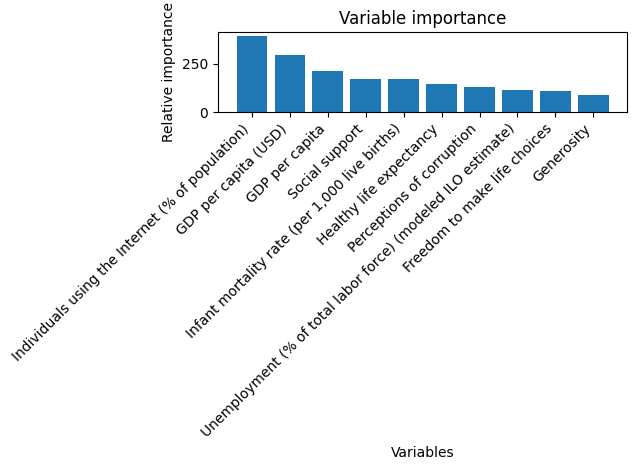

In [20]:
perf_combined_reviews, best_model_combined_reviews, leaderboard_combined_reviews = auto_training_pipeline(
    df=combined_df,
    target_col='Score',
    max_runtime_secs=300,
    max_models=10,
    sort_metric='mse',
    balance_classes=False,
    print_metrics=True,
    show_scoring_history=True,
    show_variable_importance=True,
    shutdown_h2o_after_train=False
)

In [21]:
leaderboard_combined_reviews

model_id,mse,mean_per_class_error,logloss,rmse
DRF_1_AutoML_1_20250311_204055,0.342629,0.60102,0.975087,0.585345
XRT_1_AutoML_1_20250311_204055,0.361802,0.61512,1.05842,0.6015
GBM_grid_1_AutoML_1_20250311_204055_model_1,0.383779,0.584215,1.14914,0.619499
GBM_3_AutoML_1_20250311_204055,0.388227,0.587386,1.15149,0.623078
GBM_4_AutoML_1_20250311_204055,0.393343,0.579007,1.16877,0.627171
GBM_2_AutoML_1_20250311_204055,0.397843,0.591462,1.16351,0.630748
GBM_grid_1_AutoML_1_20250311_204055_model_2,0.400505,0.617384,1.16709,0.632854
GBM_5_AutoML_1_20250311_204055,0.418272,0.600746,1.2893,0.646739
StackedEnsemble_AllModels_1_AutoML_1_20250311_204055,0.431558,0.61015,1.28071,0.656931
StackedEnsemble_BestOfFamily_1_AutoML_1_20250311_204055,0.436527,0.682363,1.29794,0.660702


In [22]:
best_model_combined_reviews

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20250311_204055


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    39                 234                         40169                  1            10           5.07265       2             19            8.56838

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.2745043691420623
RMSE: 0.5239316454863767
LogLoss: 1.7854640035461833
Mean Per-Class Error: 0.40377892194253745
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
3    4    5    6    7    8    Error     Rate
---  ---  ---  ---  ---  ---  --------  -------
1    3    0    0    0    0    0.75      3 / 4
0    13   4    2    0    0    0.315789  6 / 19
0    5    10   8    0    0    0.565217  13 / 23
0    2    1    28   1    0    0.125     4 / 32
0    0    0    0    16   0    0         0 / 16
0    0    0    0    2    1    0.666667  2 / 3
1    23   15   38   19   1    0.28866   28 / 97

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.71134
2    0.948454
3    0.948454
4    0.958763
5    0.969072
6    1

ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.34995772789454993
RMSE: 0.5915722507813816
LogLoss: 1.0852165898090964
Mean Per-Class Error: 0.46428571428571425
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
3    4    5    6    7    8    Error     Rate
---  ---  ---  ---  ---  ---  --------  ------
0    1    0    0    0    0    1         1 / 1
0    5    2    0    0    0    0.285714  2 / 7
0    0    2    2    0    0    0.5       2 / 4
0    0    0    2    0    0    0         0 / 2
0    0    0    1    0    0    1         1 / 1
0    0    0    0    0    0    nan       0 / 0
0    6    4    5    0    0    0.4       6 / 15

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.6
2    0.8
3    0.933333
4    1
5    1
6    1

ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.34262890129987594
RMSE: 0.5853451129888042
LogLoss: 0.9750872253272224
Mean Per-Class Error: 0.6010202135774217
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
3    4    5    6    7    8    Error     Rate
---  ---  ---  ---  ---  ---  --------  -------
0    4    0    0    0    0    1         4 / 4
0    8    9    2    0    0    0.578947  11 / 19
1    5    8    9    0    0    0.652174  15 / 23
0    2    3    24   3    0    0.25      8 / 32
0    0    0    2    14   0    0.125     2 / 16
0    0    0    0    3    0    1         3 / 3
1    19   20   37   20   0    0.443299  43 / 97

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.556701
2    0.886598
3    0.958763
4    1
5    1
6    1

Cross-Val